In [42]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 32
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [43]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

最終的には、使うtrain, testデータは4000個になる。

In [44]:
N=2000

2個つながった画像にする。公平性のため、左右を反対にした同じペアも加える。

In [45]:
def conv_x(x0):
    x1 = []
    for i in range(N):
        x1.append(np.c_[x0[i*2][:,:,0], x0[i*2+1][:,:,0]])
        x1.append(np.c_[x0[i*2+1][:,:,0], x0[i*2][:,:,0]])
    return np.array(x1).reshape(2*N,28,56,1)
    
x_train = conv_x(x_train)
x_test = conv_x(x_test)

# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

ラベルのほうは、[2 9] -> [0 0 1 0 0 0 0 0 0 1] のようなbinalizationをする

In [46]:
def conv_y(y0):
    y1 = []
    for i in range(N):
        y = np.zeros(10)
        digit1 = y0[i*2]
        digit2 = y0[i*2 +1]        
        y[digit1] = 1
        y[digit2] = 1
        y1.append(y)
        y1.append(y)
    return np.array(y1)
y_train = conv_y(y_train)
y_test = conv_y(y_test)

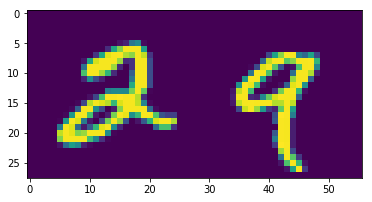

In [47]:
plt.imshow(x_train[5][:,:,0])

In [48]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1.])

In [49]:
input_shape = (28,56,1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))
model.add(Dense(num_classes, activation='sigmoid'))

#model.compile(loss=keras.losses.categorical_crossentropy,
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 4000 samples, validate on 4000 samples
Epoch 1/16
4000/4000 [==============================] - 2s 400us/step - loss: 0.4925 - acc: 0.8070 - val_loss: 0.4262 - val_acc: 0.8186
Epoch 2/16
4000/4000 [==============================] - 1s 263us/step - loss: 0.3881 - acc: 0.8408 - val_loss: 0.3043 - val_acc: 0.8757
Epoch 3/16
4000/4000 [==============================] - 1s 259us/step - loss: 0.2971 - acc: 0.8795 - val_loss: 0.2205 - val_acc: 0.9152
Epoch 4/16
4000/4000 [==============================] - 1s 261us/step - loss: 0.2465 - acc: 0.9024 - val_loss: 0.1788 - val_acc: 0.9296
Epoch 5/16
4000/4000 [==============================] - 1s 249us/step - loss: 0.2049 - acc: 0.9203 - val_loss: 0.1548 - val_acc: 0.9412
Epoch 6/16
4000/4000 [==============================] - 1s 257us/step - loss: 0.1830 - acc: 0.9325 - val_loss: 0.1354 - val_acc: 0.9494
Epoch 7/16
4000/4000 [==============================] - 1s 254us/step - loss: 0.1611 - acc: 0.9402 - val_loss: 0.1201 - val_acc: 0.9576
